In [1]:
from fineNeat.neat_src import loadHyp, updateHyp
from fineNeat.domain import load_task
from fineNeat.neat_src import DataGatherer, Neat 
from fineNeat.domain.config import games
from fineNeat.domain.task_gym import GymTask

game = games["slimevolley"]
task = GymTask(game)

hyp_default = 'fineNeat/fineNeat/p/default_sneat.json'
hyp_adjust = "fineNeat/fineNeat/p/volley.json"
fileName = "volley"

hyp = loadHyp(pFileName=hyp_default, load_task=load_task)
updateHyp(hyp,load_task,hyp_adjust)

hyp["cap_layer"] = 3
# neat = Neat(hyp)

In [2]:
def mutate(ind, p): 
    child, _ = ind.mutate(p=p)
    if child: 
       return child 
    else:
        return ind.safe_mutate(p)

In [3]:
indiv_json = "runs/sneat_tune/sneat_00016000.json"
from fineNeat import Ind, viewInd
from tqdm import tqdm 

ind = Ind.load(indiv_json)
ind.express()

for _ in tqdm(range(10000)):
    child = mutate(ind, hyp) # re-implement issue
    ind = child 

 30%|███       | 3047/10000 [00:10<00:24, 288.62it/s]

In [21]:
ind.express()

False

In [20]:
ind.safe_mutate(hyp)

AssertionError: :: Naive parameter mutation gives errored individual

In [2]:
from fineNeat import Ind, viewInd
import numpy as np
from tqdm import tqdm
import random

pop = neat.ask()

# reward assignment (naive looping approach)
reward = np.empty(len(pop), dtype=np.float64)
n_opponents = 10
for idx, ind in enumerate(tqdm(pop)):  # naive loop took about 18 seconds
    reward[idx] = task.getTournamentScore(ind, random.sample(pop, n_opponents))

100%|██████████| 128/128 [00:16<00:00,  7.76it/s]


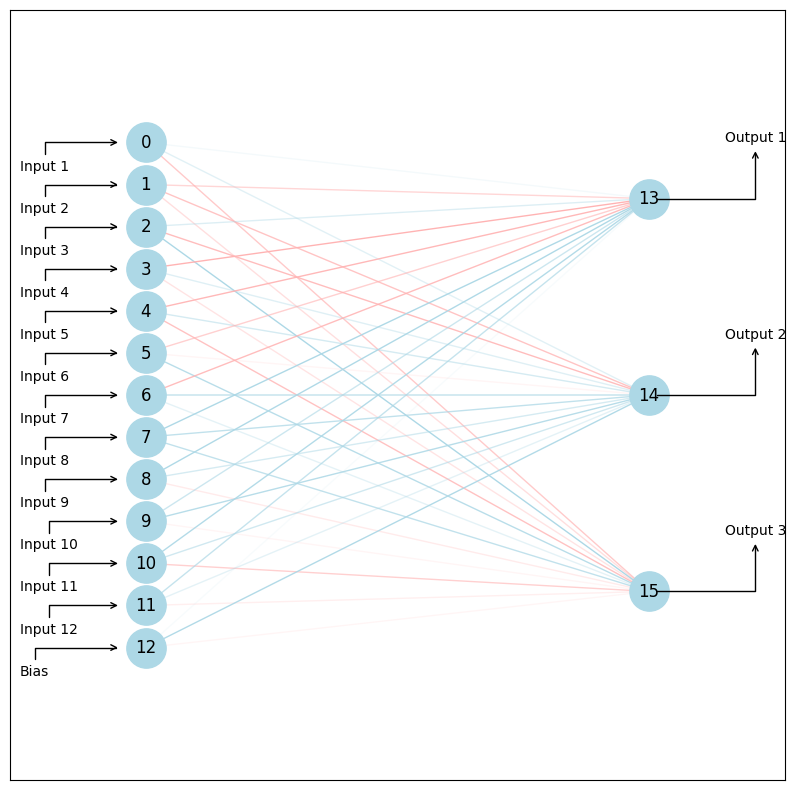

In [3]:
from fineNeat.neat_src.dataGatherer import DataGatherer

neat.tell(reward)
data = DataGatherer(fileName, hyp)
data.gatherData(neat.pop,neat.species)
data.display()
data.save(gen=0)